# Pokemon RPG Image Generator

## To use: 

- Run all code cells in order. There should not be any errors or outputs except for images.

- When you see the cell saying `Modify Here`, edit the marked portion of that cell and run it.

### Imports

In [1]:
from PIL import Image

### Setup images and text

In [2]:
all_text = Image.open("images/text-sheet.png")
width, height = all_text.size
text_width = 12
text_height = 12

chars = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890:+-,.¡!¿?''“”♂♀_ /"
text_dict = {}

i=0
for char in chars:
    text_dict[char] = all_text.crop((i*text_width,0,(i+1)*text_width,text_height))
    i += 1

portrait_background = Image.open("images/background.png")
h,w = portrait_background.size


vibes = Image.open("images/vibes.png")
image = None

vibe_types = ["RED", "RED_ORANGE", "ORANGE", 
              "ORANGE_YELLOW", "YELLOW", "LIGHT_YELLOW", 
              "LIGHT_GREEN", "GREEN", "BLUE_GREEN", "LIGHT_BLUE", 
              "BLUE", "PURPLE", "LIGHT_PINK", "PINK", "MAGENTA"]
vibe_dict = {}
w,h = vibes.size
screen_width = w/len(vibe_types)

i=0
for color in vibe_types:
    vibe_dict[color] = vibes.crop((i*screen_width,0,(i+1)*screen_width,h))
    i += 1

# Modify Here

This is where you will configure the content of the plate.

- Make sure you define the path to the pokemon image you want, and that the image is either 96x96 or 288x288.
- You can type almost any text you want in here for name/ability, but if you use any special characters not included in the text sheet file file, you will get an error later.

Here is a sample of what the faceplate will look like


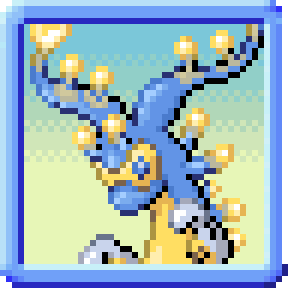

In [3]:
# ---- Faceplate pokemon. Run this a few times until it looks correct ----
POKEMON_IMAGE_PATH = "images/pokemon/171.446.png"
X_OFFSET = 10
Y_OFFSET = 10


# --- Define stuff on the content of the card ---
LEADER = True           # True if this is a larger leader plate. False otherwise
NAME = "Sample Player"
APPLES = "4/6"
ABILITY_NAME = "Lightning Rod"

# --- Items ---
# Items should be a 16x16 file in the images/items folder
ITEM1 = "apple"
ITEM2 = "gold-gummi"
ITEM3 = "pink-berry"
ITEM4 = "item"
ITEM5 = "tm"
ITEM6 = "none"
ITEM7 = "none"
ITEM8 = "none"

ITEM1_ACTIVE = False
ITEM2_ACTIVE = True
ITEM3_ACTIVE = False
ITEM4_ACTIVE = False
ITEM5_ACTIVE = False
ITEM6_ACTIVE = False
ITEM7_ACTIVE = False
ITEM8_ACTIVE = False

# --- Background and styling ---
FRAME_COLOR = "BLUE"    # BLUE, PINK, or GREEN

TOP_COLOR_CHOICE = "LIGHT_BLUE"     # Color choices defined below
BOTTOM_COLOR_CHOICE = "YELLOW" 
# "RED", "RED_ORANGE", "ORANGE", "ORANGE_YELLOW", "YELLOW", 
# "LIGHT_YELLOW", "LIGHT_GREEN", "GREEN", "BLUE_GREEN", 
# "LIGHT_BLUE", "BLUE", "PURPLE", "LIGHT_PINK", "PINK", "MAGENTA"

# ----- DO NOT MODIFY BELOW HERE ----------

if FRAME_COLOR == "PINK":
    frame = Image.open("images/frame_pink.png")
elif FRAME_COLOR == "GREEN":
    frame = Image.open("images/frame_green.png")
else:
    frame = Image.open("images/frame_blue.png")

# This refreshes the background on this cell
portrait_background = Image.open("images/background.png")

pokemon = Image.open(POKEMON_IMAGE_PATH)
pc = pokemon.resize((96,96), resample=0).crop((X_OFFSET, Y_OFFSET, X_OFFSET+w, Y_OFFSET+h))
portrait_background.paste(pc, mask=pc)
frame.paste(portrait_background, (4,4), mask=portrait_background)
faceplate = frame

print("Here is a sample of what the faceplate will look like")
faceplate.resize((288,288), resample=0)

## Run all the cells below once the above image looks correct

In [4]:
# Helper code to allow us to generate text boxes of any size)
frame_top_left = frame.crop((0,0,5,5))
frame_top_right = frame.crop((frame.width-5,0,frame.width, 5))
frame_bottom_left = frame.crop((0,frame.height-5, 5, frame.height))
frame_bottom_right = frame.crop((frame.width-5,frame.height-5,frame.width,frame.height))

frame_top = frame.crop((frame.width//2,0,frame.width//2 + 1, 5))
frame_right = frame.crop((frame.width-5, frame.height//2, frame.width, frame.height//2 + 1))
frame_left = frame.crop((0 ,frame.height//2 ,5, frame.height//2 + 1))
frame_bottom = frame.crop((frame.width//2,frame.height -5 ,frame.width//2 + 1, frame.height))


def make_frame_with_size(x,y):
    new_frame = Image.new("RGBA",(x,y), (0,0,0,0))
    if x < 10 or y<10:
        raise ValueError

    new_frame.paste(frame_top_left, (0,0), mask=frame_top_left)
    new_frame.paste(frame_top_right, (x-5,0), mask=frame_top_right)
    new_frame.paste(frame_bottom_left, (0,y-5), mask=frame_bottom_left)
    new_frame.paste(frame_bottom_right, (x-5,y-5), mask=frame_bottom_right)

    width_to_fill = x-10
    height_to_fill = y-10

    top_bar = frame_top.resize((width_to_fill,5), resample=0)
    bottom_bar = frame_bottom.resize((width_to_fill,5), resample=0)
    left_bar = frame_left.resize((5,height_to_fill), resample=0)
    right_bar = frame_right.resize((5,height_to_fill), resample=0)

    new_frame.paste(top_bar, (5,0), mask=top_bar)
    new_frame.paste(bottom_bar, (5,y-5), mask=bottom_bar)
    new_frame.paste(left_bar, (0,5), mask=left_bar)
    new_frame.paste(right_bar, (x-5,5), mask=right_bar)

    black_box = Image.new("RGBA",(x-8, y-8), (32,32,32,255))
    new_frame.paste(black_box, (4,4), mask=black_box)

    return new_frame

# Helper function to write out text
def paste_string_at_start_coords(image, word, x_start, y_start, text_spacing, big=False):
    i = 0
    for char in word:
        char_img = text_dict[char].resize((24,24), resample=0) if big else text_dict[char]
        image.paste(char_img, (x_start + (i*text_spacing), y_start), mask=char_img)
        i+= 1

## Make the card

This is the cell where all the drawing happens. If you need to adjust the placement of anything on the canvas, here is where you can play with that

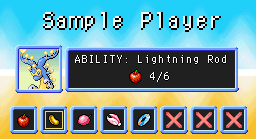

In [5]:
# Make the wavy background
top_im = vibe_dict[TOP_COLOR_CHOICE]
w,h = top_im.size
im = top_im.crop((0, 0, w, h/2))

background = vibe_dict[BOTTOM_COLOR_CHOICE]
background.paste(im, mask=im.convert('RGBA'))

# Try to make the middle look a little less ugly
white = Image.new("RGBA",(background.width, background.height//20), (255,255,255, 235))
background.paste(white, (0, background.height//2))

# Resize the image based on what kind of card we are making
if LEADER:
    background = background.resize((w, background.height - background.height//4))
else:
    background = background.resize((w, background.height//3))

# Composite our elements on there
image = background
image_width, image_height = image.size

text_spacing = 7
text_offset_x = 60
text_offset_y = 10
text_box_height = 45 if LEADER else 25

image.paste(faceplate, (15, image_height//2 - faceplate.height//2), mask=faceplate)

# Make the textbox
ability = f"ABILITY: {ABILITY_NAME}"
textbox_size = len(ability) * (text_spacing)+ 20
text_box = make_frame_with_size(textbox_size,text_box_height)
paste_string_at_start_coords(text_box, ability, 7, 7, text_spacing)

if LEADER:
    apple = Image.open("images/apple.png")
    text_box.paste(apple, (text_box.width//2 - 24, text_box.height//2), mask=apple)
    paste_string_at_start_coords(text_box, APPLES, text_box.width//2 - 5, text_box.height//2 +2, text_spacing)

right_x_offset = (image.width//2 - text_box.width//2 + faceplate.width//2)

image.paste(text_box, (right_x_offset, image.height//2 - text_box.height//2 + text_box_height//6 - 7), mask=text_box)

# Name
if LEADER:
    paste_string_at_start_coords(image, NAME, (image.width//2 - ((len(NAME) * text_spacing))), text_offset_y, text_spacing*2, big=True)

    # Add items
    items = [(ITEM1, ITEM1_ACTIVE), (ITEM2, ITEM2_ACTIVE), (ITEM3, ITEM3_ACTIVE), (ITEM4, ITEM4_ACTIVE), (ITEM5, ITEM5_ACTIVE), (ITEM6, ITEM6_ACTIVE), (ITEM7, ITEM7_ACTIVE), (ITEM8, ITEM8_ACTIVE)]
    
    for i in range(0,8):
        item, is_active = items[i]
        item_image = Image.open(f"images/items/{item}.png")
        item_box = make_frame_with_size(16+10+2,16+10+2)
        
        # Add an outline if we need it
        if is_active:
            outline = Image.new("RGBA", (18, 18), (240, 216, 104, 255))
            fillin = Image.new("RGBA", (16, 16), (32,32,32,255))
            item_box.paste(outline, (5,5), mask=outline)
            item_box.paste(fillin, (6,6), mask=fillin)

        item_box.paste(item_image, (6,6), mask=item_image)
        image.paste(item_box, ((30 * i) + 10, image.height-28 - 5), mask=item_box)

image.show()
image


## Run this cell for upscaled images

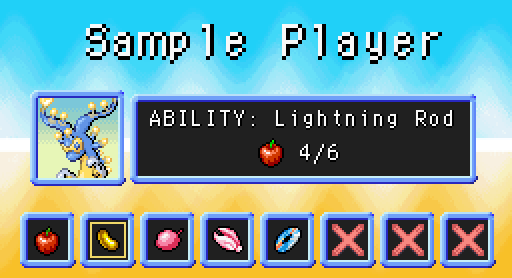

In [6]:
image.resize((image.width*2,image.height*2), resample=0).show()
image.resize((image.width*2,image.height*2), resample=0)